In [34]:
import kornia
import requests
from PIL import Image
import jax.numpy as jnp
import numpy as np

In this notebook we will show how you can use Kornia's inbuilt Ivy Transpiler methods to integrate Kornia into your projects built in different frameworks. In this example we will show how you can use `kornia.enhance.sharpness` to sharpen an image in Jax.

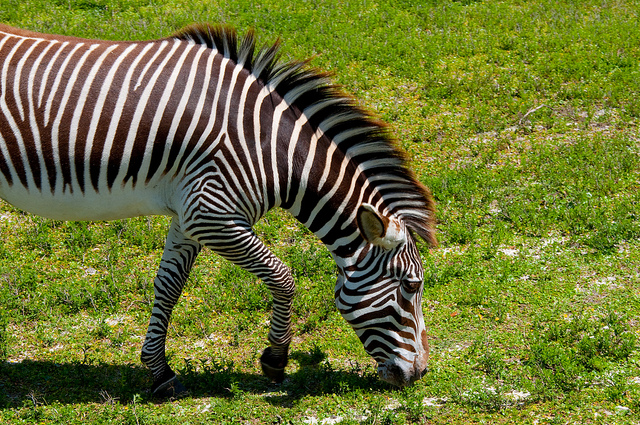

In [35]:
url = "http://images.cocodataset.org/train2017/000000000034.jpg"
raw_img = Image.open(requests.get(url, stream=True).raw)
img = jnp.transpose(jnp.array(raw_img), (2, 0, 1))
img = jnp.expand_dims(img, 0) / 255
display(raw_img)

In [36]:
jax_sharpness = kornia.to_jax(kornia.enhance.sharpness) # transpile to jax
out = jax_sharpness(img, 3.0)
type(out)

jaxlib.xla_extension.ArrayImpl

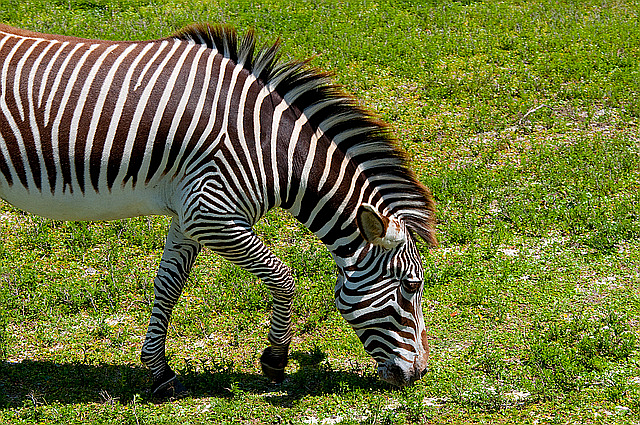

In [37]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

We can also do this for other supported frameworks such as Tensorflow!

In [38]:
import tensorflow as tf

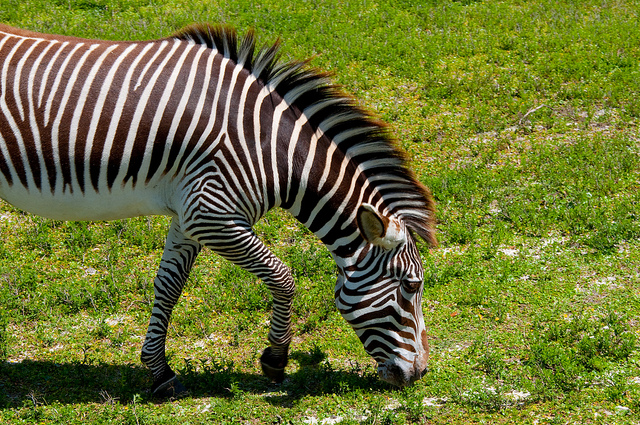

In [39]:
img = tf.transpose(tf.convert_to_tensor(raw_img), (2, 0, 1))
img = tf.expand_dims(img, 0) / 255
display(raw_img)

In [40]:
# blur the image

tf_blur = kornia.to_tensorflow(kornia.filters.max_blur_pool2d) # transpile to tensorflow
out = tf_blur(img, (10,10))
type(out)

tensorflow.python.framework.ops.EagerTensor

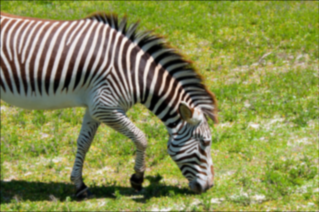

In [41]:
np_image = np.uint8(np.array(out[0])*255)
display(Image.fromarray(np.transpose(np_image, (1, 2, 0))))

As you can see, we can use Kornia's inbuilt transpiler methods to convert Kornia operations into the framework of your choice. This is useful if you want to use Kornia's operations in a framework that is not currently supported by Kornia!